## *Identify Fraud With Self Organizing Map*:

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing the dataset
dataset=pd.read_csv('Credit_Card_Applications.csv')
# dataset.head()
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
# y
X.head()


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159


### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)#normalization
# X

### Training the SOM

In [8]:
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
# input_len=no of columns in X
# sigma=radius of the  NEIGHBOURHOOD
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

### Visualizing the results

### Find the  customer who got approval but  are fraud?

In [9]:
print(X)
print(y)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]
0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1
Name: Class, Length: 690, dtype: int64


In [10]:
# MID=Mean Interneuron Distance
# MID=It is the mean of distances` between the winning node and its neighbouring nodes 
# highier the MID farther the winning node from its neighbour
# node with high MID have highier chance of being the outlier
# winning node with highiest MId is the outlier

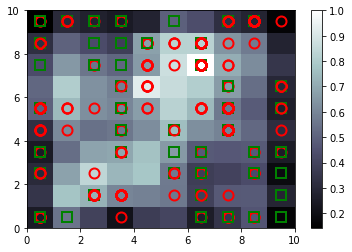

In [11]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
# winning node with highiest MID have white color and they are the outlier
# Winning node with lowest MID have dark color

markers=['o','s']
colors=['r','g']
# o for customer who dont get approval,
# s(square) for customer who  get approval
#r for customer who dont get approval,
# g for customer who  get approval
# i is the index of the customer(0,1,2......689)
# x is the corresponding vector of the customer(input features of the customer like A1,A2...A14)
# x is the X 
for i,x in enumerate(X):
    w=som.winner(x)#find the winning node for input customer
    plot(
        w[0]+0.5,#w[0] is X-coordinate
        w[1]+0.5,#w[1] is y-coordinate
        markers[y[i]],#value of y[i] is either 0 or 1
        markeredgecolor=colors[y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2
        )
show()


## Discussion:
>* Colorbox with red circles and green rectangles are the different winning nodes
* Red circle represent customers associated with that winning node dont get credit card approval
* Green Square represent customers associated with that winning node  get credit card approval
* Both Red circle and Green Square represent some customers associated with that winning node dont get credit card approval while some customers get approval


### Conclusin:
* In the above SOM if there is **Green Rectangle** in the white box then it means that there is a high chance of fraud customer getting credit card approval
* There are different winning nodes represented by green square and red circle and each winning node has its list of associated customers 

### Finding the Fraud

In [12]:
mappings=som.win_map(X)
# find the list of customers associated with the white winning nodes or fraud
frauds=np.concatenate((mappings[(4,6)],mappings[(6,7)]),axis=0)
# frauds
frauds=sc.inverse_transform(frauds)
frauds[0]#id of the potential fraud customer 
# print(frauds)
# len(frauds[1])

array([1.5767264e+07, 1.0000000e+00, 7.4830000e+01, 1.9000000e+01,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 4.0000000e-02,
       0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
       2.0000000e+00, 0.0000000e+00, 3.5200000e+02])